In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
dataset = pd.read_csv('CreditCard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Pre-processing
# part 1 - check missing data - no missing data found
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
# part 2 - encoding part - not required as all variables are numeric
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#sns.heatmap(dataset.corr(), annot=True, cmap='rainbow')

In [6]:
# part 3 - outlier treatement - not required as features (v1 to v28) are very close and range is very less except amount and time


In [7]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,4.247308e-13,-3.050183e-13,8.692882e-14,-1.179710e-12,...,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# part 4 - feature scaling - not required since range is very less

In [9]:
# part 5 - imbalance dataset - no need to balance it, we have to use advance algorithm (ensemble algorithm - cascading method)
# below highlighed model mentioned
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Isolation Forest Model - this model is dedicated to handle outlier and anomaly detection (fraud detection)
## Local Outlier Factor Model 

In [10]:
284315 / 492

577.8760162601626

In [11]:
import sklearn
import scipy
from pylab import rcParams
rcParams['figure.figsize'] = 16,12
RANDOM_SEED = 105
LABELS = ['Normal', 'Fraud']

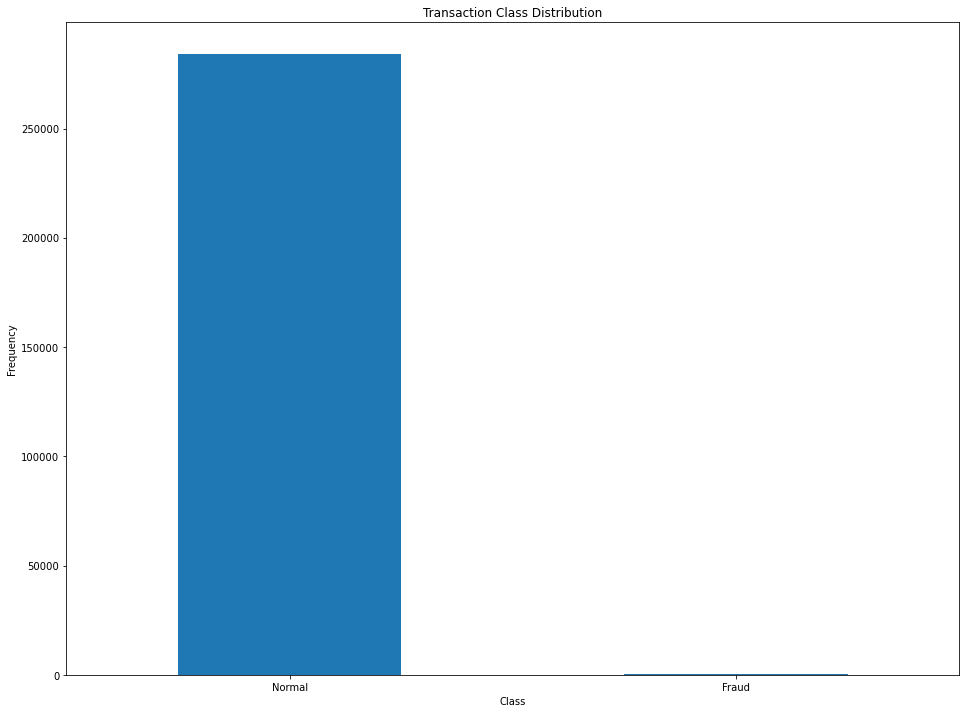

In [12]:
count_classes = pd.value_counts(dataset['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [13]:
normal = dataset[dataset['Class']==0]
fraud = dataset[dataset['Class']==1]

print(normal.shape, fraud.shape)

(284315, 31) (492, 31)


In [14]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [15]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

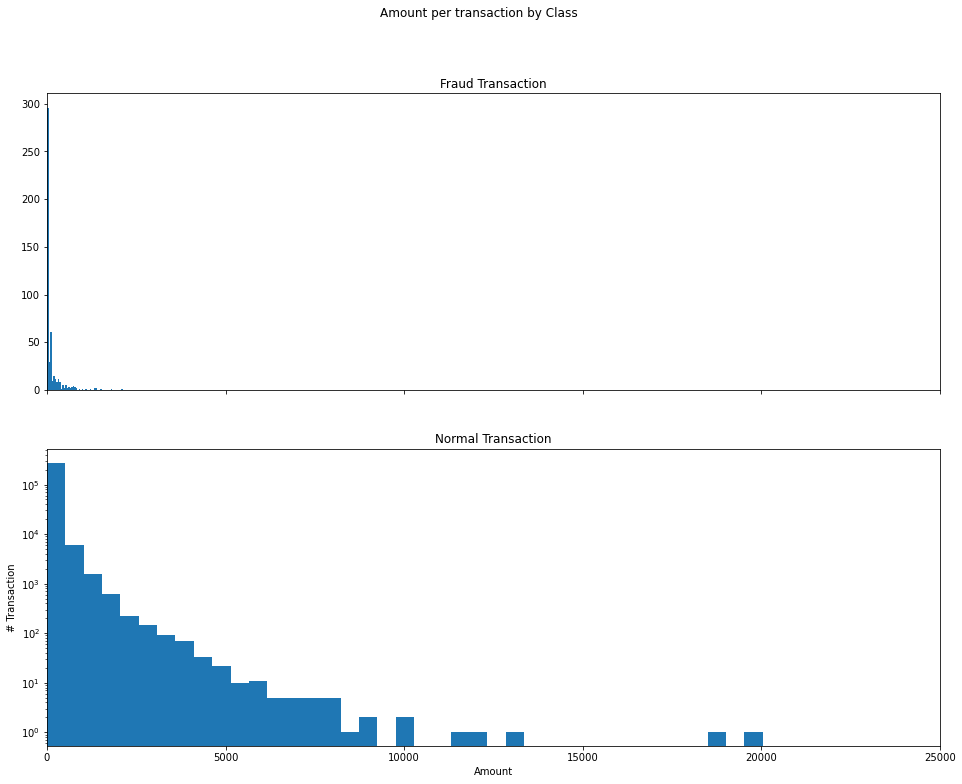

In [17]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle("Amount per transaction by Class")
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title("Fraud Transaction")

ax2.hist(normal.Amount, bins=bins)
ax2.set_title("Normal Transaction")

plt.xlabel("Amount")
plt.ylabel("# Transaction")

plt.xlim(0, 25000)
plt.yscale('log')
plt.show()

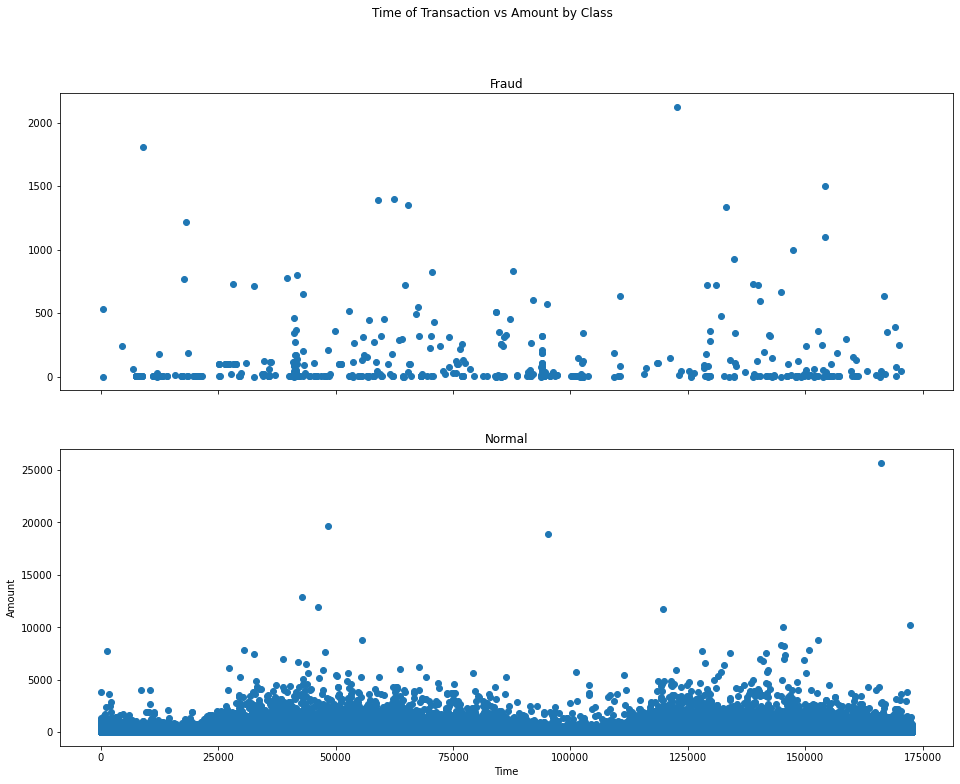

In [18]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle("Time of Transaction vs Amount by Class")

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel("Time")
plt.ylabel("Amount")

plt.show()

<AxesSubplot:xlabel='Time', ylabel='Density'>

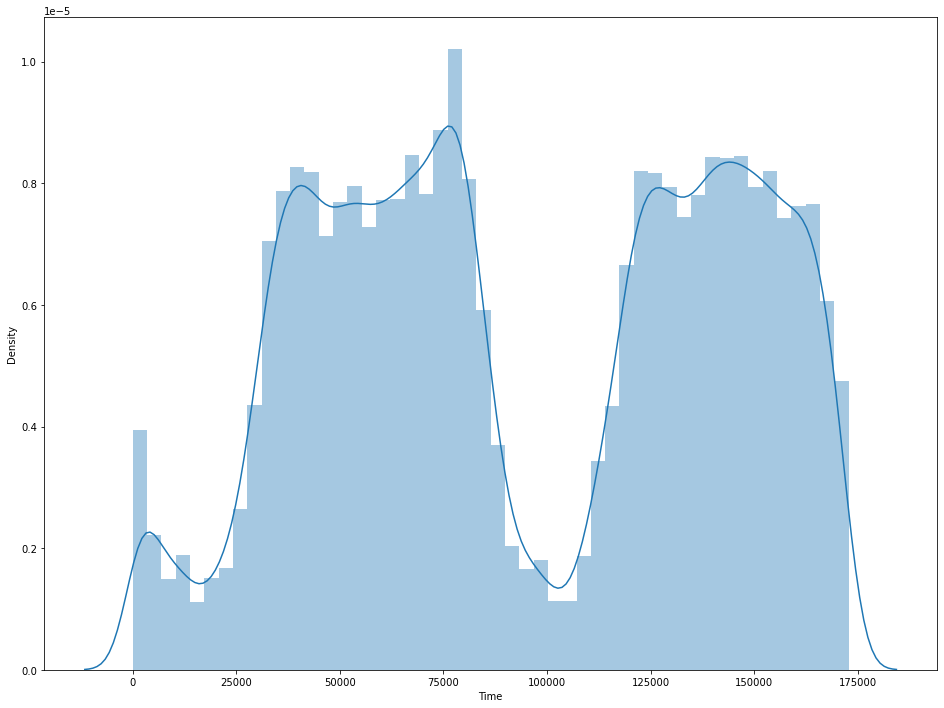

In [19]:
sns.distplot(dataset['Time'])

In [20]:
dataset.shape

(284807, 31)

In [21]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [22]:
outlier_total_faction = 492/(492+284315)
outlier_total_faction 

0.001727485630620034

In [23]:
# taking 10% dataset only for buidling and predicting the model
# request you to take all data together and then perform

In [24]:
data1 = dataset.sample(frac=0.1, random_state=1)
data1.shape

(28481, 31)

In [25]:
data1['Class'].value_counts()

0    28432
1       49
Name: Class, dtype: int64

In [26]:
fraud = data1[data1['Class']==1]
valid = data1[data1['Class']==0]

In [27]:
print(fraud.shape, valid.shape)

(49, 31) (28432, 31)


In [28]:
outlier_faction = 49/(49+28432)
outlier_faction

0.0017204452090867595

In [29]:
columns = data1.columns.tolist()
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [30]:
# split the data into ind variable and dep variable
columns = [c for c in columns if c not in ['Class']]
target = 'Class'

In [31]:
x1 = data1.drop(['Class'], axis=1)
y1 = data1['Class']

In [32]:
x1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.196039,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.009041,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,0.206028,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,0.315823,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.105286,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76


In [33]:
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [34]:
target

'Class'

In [35]:
x = data1[columns]
y = data1[target]
state = np.random.RandomState(101)
x_outlier = state.uniform(low=0, high=1, size=(x.shape[0],x.shape[1]))
print(x.shape, y.shape)

(28481, 30) (28481,)


In [36]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.196039,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.009041,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,0.206028,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,0.315823,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.105286,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76


In [37]:
# splitting the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=101)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(19936, 30) (8545, 30) (19936,) (8545,)


# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [39]:
y_pred_logit_train = logit.predict(x_train)
y_pred_logit_test = logit.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [41]:
print(confusion_matrix(y_train, y_pred_logit_train))
print("#############"*5)
print(confusion_matrix(y_test, y_pred_logit_test))

[[19895    11]
 [   13    17]]
#################################################################
[[8522    4]
 [  10    9]]


In [42]:
print(classification_report(y_train, y_pred_logit_train))
print("#############"*5)
print(classification_report(y_test, y_pred_logit_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19906
           1       0.61      0.57      0.59        30

    accuracy                           1.00     19936
   macro avg       0.80      0.78      0.79     19936
weighted avg       1.00      1.00      1.00     19936

#################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8526
           1       0.69      0.47      0.56        19

    accuracy                           1.00      8545
   macro avg       0.85      0.74      0.78      8545
weighted avg       1.00      1.00      1.00      8545



In [43]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_logit_train))
print("#############"*5)
print("Test Accuracy :",accuracy_score(y_test, y_pred_logit_test))

Training Accuracy : 0.9987961476725522
#################################################################
Test Accuracy : 0.9983616149795201


# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion ='entropy')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [45]:
y_pred_dtree_train = dtree.predict(x_train)
y_pred_dtree_test = dtree.predict(x_test)

In [46]:
print(confusion_matrix(y_train, y_pred_dtree_train))
print("#############"*5)
print(confusion_matrix(y_test, y_pred_dtree_test))

print(classification_report(y_train, y_pred_dtree_train))
print("#############"*5)
print(classification_report(y_test, y_pred_dtree_test))

print("Training Accuracy :", accuracy_score(y_train, y_pred_dtree_train))
print("#############"*5)
print("Test Accuracy :",accuracy_score(y_test, y_pred_dtree_test))

[[19906     0]
 [    0    30]]
#################################################################
[[8523    3]
 [  10    9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19906
           1       1.00      1.00      1.00        30

    accuracy                           1.00     19936
   macro avg       1.00      1.00      1.00     19936
weighted avg       1.00      1.00      1.00     19936

#################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8526
           1       0.75      0.47      0.58        19

    accuracy                           1.00      8545
   macro avg       0.87      0.74      0.79      8545
weighted avg       1.00      1.00      1.00      8545

Training Accuracy : 1.0
#################################################################
Test Accuracy : 0.9984786424809831


In [47]:
from sklearn import tree

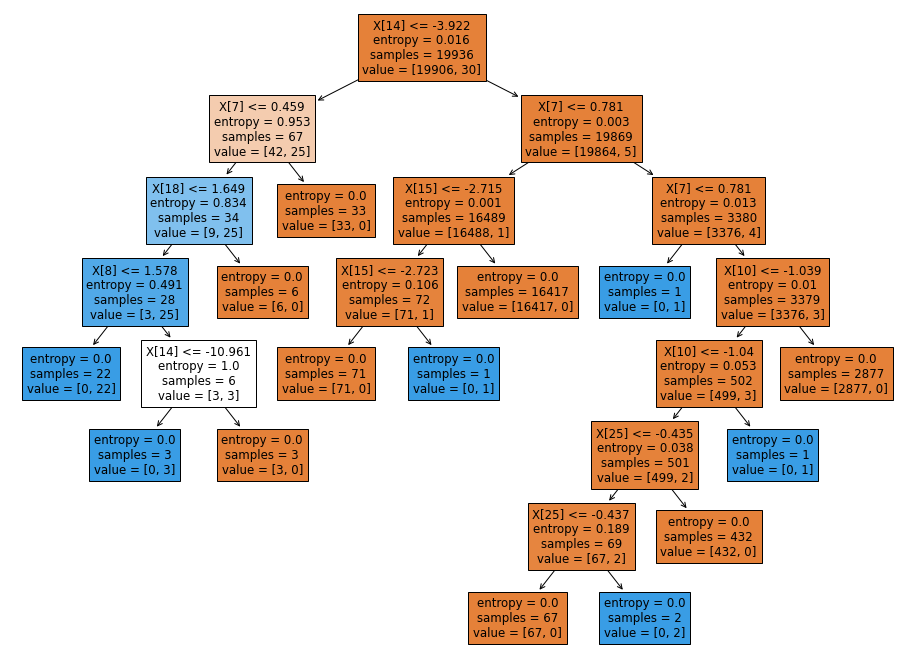

In [48]:
tree.plot_tree(dtree, filled=True)
plt.show()

# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, criterion ='entropy')
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [50]:
y_pred_rfc_train = rfc.predict(x_train)
y_pred_rfc_test = rfc.predict(x_test)

In [51]:
print(confusion_matrix(y_train, y_pred_rfc_train))
print("#############"*5)
print(confusion_matrix(y_test, y_pred_rfc_test))

print(classification_report(y_train, y_pred_rfc_train))
print("#############"*5)
print(classification_report(y_test, y_pred_rfc_test))

print("Training Accuracy :", accuracy_score(y_train, y_pred_rfc_train))
print("#############"*5)
print("Test Accuracy :",accuracy_score(y_test, y_pred_rfc_test))

[[19906     0]
 [    0    30]]
#################################################################
[[8525    1]
 [   8   11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19906
           1       1.00      1.00      1.00        30

    accuracy                           1.00     19936
   macro avg       1.00      1.00      1.00     19936
weighted avg       1.00      1.00      1.00     19936

#################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8526
           1       0.92      0.58      0.71        19

    accuracy                           1.00      8545
   macro avg       0.96      0.79      0.85      8545
weighted avg       1.00      1.00      1.00      8545

Training Accuracy : 1.0
#################################################################
Test Accuracy : 0.9989467524868344


# XGBoost Model

In [52]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
y_pred_xgb_train = xgb.predict(x_train)
y_pred_xgb_test = xgb.predict(x_test)

In [ ]:
print(confusion_matrix(y_train, y_pred_xgb_train))
print("#############"*5)
print(confusion_matrix(y_test, y_pred_xgb_test))

print(classification_report(y_train, y_pred_xgb_train))
print("#############"*5)
print(classification_report(y_test, y_pred_xgb_test))

print("Training Accuracy :", accuracy_score(y_train, y_pred_xgb_train))
print("#############"*5)
print("Test Accuracy :",accuracy_score(y_test, y_pred_xgb_test))

In [ ]:
# Stacking Classifier - work

In [ ]:
# Isolation Forest
# Local Outlier factor

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [ ]:
IsolationForest()

In [ ]:
LocalOutlierFactor()

In [ ]:
OneClassSVM()

In [ ]:
classification = {'Isolation Forest' : IsolationForest(n_estimators=100, 
                                                       max_samples=len(x),
                                                      contamination=outlier_faction),
                 "Local Outlier Factor" : LocalOutlierFactor(n_neighbors=20,
                                                             contamination=outlier_faction),
                 "One Class SVM" : OneClassSVM()}

In [ ]:
n_outlier = len(fraud)

for i, (clf_name, clf) in enumerate(classification.items()):
    if clf_name =='Local Outlier Factor' :
        y_pred = clf.fit_predict(x)
        score_prediction = clf.negative_outlier_factor_
    elif clf_name =='One Class SVM' :
        clf.fit(x)
        y_pred = clf.predict(x)
    else:
        clf.fit(x)
        score_prediction = clf.decision_function(x)
        y_pred = clf.predict(x)
        
    y_pred[y_pred==1] = 0
    y_pred[y_pred==-1] = 1
    n_error = (y_pred != y).sum()
    
    print("{} : {}".format(clf_name, n_error))
    print("Accuracy Score :")
    
    print(accuracy_score(y, y_pred))
    print("Classification Report :")
    print(classification_report(y, y_pred))
    